<a href="https://colab.research.google.com/github/jaesung0804/jaesung0804/blob/main/%EB%B9%85%ED%86%B5%EC%9D%BD%20week1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ridge regression model

$L(\beta) = \sum_{i=1}^n (y_i- x_i^\top \beta)^2 + \alpha \|\beta\|^2$

In [ ]:
#%% Ridge regression
# import module
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


from matplotlib import pyplot
from sklearn.linear_model import Ridge
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split

In [ ]:
# data load & split
# load dataset
boston = load_boston()
data = boston.data
print(boston.DESCR) #get a description of the dataset

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [ ]:
data[0,:]

array([6.320e-03, 1.800e+01, 2.310e+00, 0.000e+00, 5.380e-01, 6.575e+00,
       6.520e+01, 4.090e+00, 1.000e+00, 2.960e+02, 1.530e+01, 3.969e+02,
       4.980e+00])

In [ ]:
# variable definition
X = data[:, 1:]
y = data[:, 0]

# train, valid, test split / 6:2:2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train, X_val,  y_train, y_val  = train_test_split(X_train, y_train, test_size=0.25, random_state=1) 

# model fitting
model = Ridge(alpha= 0.1)
model.fit(X_train,y_train)
y_pred = model.predict(X_val)

* y_pred는 $\alpha = 0.1$ 로 적합한 ridge regression의 
최적해 $\hat \beta$로 도출된 모형 $\hat f(x) = x^\top \hat \beta$ 를 이용해 validatation 데이터에 대해서 예측한 결과다. 
* $\alpha = 0$ 일때 최적해 $\hat \beta$는 OLS로 주어지며 우리는 다른 모형을  얻게 되고, 같은 데이터에 대해서도 다른 예측결과를 얻게 된다. 
* 이 $\alpha$가 ridge regression에서 복잡도를 결정해주는 튜닝 파라메터다.

In [ ]:
y_pred[4]

1.8642773813707976

ridge 회귀모형의 복잡도를 조절하기 위해서 여러개의 alpha값을 고려해본다. 각 모형마다 validation error를 저장해본다. 

In [ ]:
# tuning parameter list
alpha_list = np.arange(1, 10, 0.1)
mse = []

# model fitting 
for alp in alpha_list:
    model = Ridge(alpha=alp)
    model.fit(X_train,y_train)
    
    # prediction
    y_pred = model.predict(X_val)
    
    # mse calculate
    mse.append(np.square(np.subtract(y_pred, y_val)).mean())


Validation error를 그려본다. 

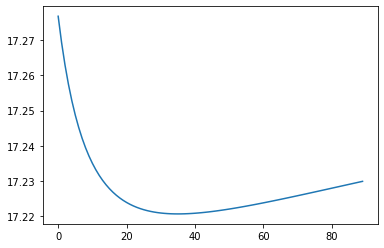

In [ ]:
plt.plot(mse)

In [ ]:
# model selection
alp_sel = alpha_list[np.argmin(mse)]

# Evaluating selection model using test data
# model fitting using selected alpha
model = Ridge(alpha=alp_sel)
model.fit(X_train,y_train)

# prediction of test y
y_pred = model.predict(X_test)

# calculate mse using test data
mse = np.square(np.subtract(y_pred, y_test)).mean()
print(mse)


15.402451521042973


# Logistic Regression

$L(\beta_0, \beta) = - \sum_{i=1}^n y_i (\beta_0+ x_i^\top \beta) + \log(1+\exp(\beta_0 + x_i^\top \beta))$  

(단, $y_i \in \{0,1\}$)

만약 $\tilde y_i = 2y_i -1 \in \{-1,1\}$  로 놓는다면

$(\beta_0, \beta) =  \sum_{i=1}^n \log(1+ \exp(-\tilde y_i (\beta_0 + x_i^\top \beta))$ 로 쓰여짐 (같은 식)

In [ ]:
#%% LogisticRegression
import numpy as np
import seaborn as sns
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split

data = sns.load_dataset("titanic")
data = data.dropna()

# variable definition
feature_names = ["pclass", "age", "sibsp", "fare"]
X = data[feature_names]
y = data["survived"]


In [ ]:
y

1      1
3      1
6      0
10     1
11     1
      ..
871    1
872    0
879    1
887    1
889    1
Name: survived, Length: 182, dtype: int64

In [ ]:

# train, valid, test split / 6:2:2
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=1)

X_train, X_val,  y_train, y_val  = train_test_split(X_train,
                                                    y_train,
                                                    test_size=0.25,
                                                    random_state=1) 


In [ ]:
# logitstic regression model
model_logit = LogisticRegression()

# using feature "pclass", "age", "sibsp"
model_logit.fit(X_train, y_train)

LogisticRegression()

In [ ]:
# Return the mean accuracy on the given test data and labels.
acc_0 = model_logit.score(X_train, y_train)
acc_0

0.7037037037037037

In [ ]:
acc_1 = model_logit.score(X_val, y_val)
acc_1

0.8108108108108109

In [ ]:
# using feature "pclass", "age", "sibsp", "fare"
model_logit.fit(X_train[feature_names[:3]], y_train)
acc_2 = model_logit.score(X_val[feature_names[:3]], y_val)
acc_2

0.7837837837837838

In [ ]:
select_model = np.argmax([acc_1, acc_2])
# Evaluating selection model using test data
# model fitting using select_model
model_logit = LogisticRegression()
model_logit.fit(X_test[feature_names[:(4-select_model)]], y_test)
acc = model_logit.score(X_test, y_test)
print(acc)

0.6756756756756757


In [ ]:
# GMM
# module import
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.metrics import rand_score
import pandas as pd

# load iris data
iris_data = load_iris()
irisDF = pd.DataFrame(data=iris_data.data, columns=['sepal_length','sepal_width','petal_length','petal_width'])
print(irisDF)


     sepal_length  sepal_width  petal_length  petal_width
0             5.1          3.5           1.4          0.2
1             4.9          3.0           1.4          0.2
2             4.7          3.2           1.3          0.2
3             4.6          3.1           1.5          0.2
4             5.0          3.6           1.4          0.2
..            ...          ...           ...          ...
145           6.7          3.0           5.2          2.3
146           6.3          2.5           5.0          1.9
147           6.5          3.0           5.2          2.0
148           6.2          3.4           5.4          2.3
149           5.9          3.0           5.1          1.8

[150 rows x 4 columns]


In [ ]:
# GMM fitting
gmm = GaussianMixture(n_components=3, random_state=0).fit(iris_data.data)
gmm_cluster_labels = gmm.predict(iris_data.data)
print(gmm_cluster_labels)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 1 2 1 2
 2 2 2 1 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1]


In [ ]:
rand_score(iris_data.target, gmm_cluster_labels)

0.9574944071588367

In [ ]:
# permutation invariant!
irisDF['gmm_cluster'] = gmm_cluster_labels
irisDF['target'] = iris_data.target
print(irisDF)

     sepal_length  sepal_width  petal_length  petal_width  gmm_cluster  target
0             5.1          3.5           1.4          0.2            0       0
1             4.9          3.0           1.4          0.2            0       0
2             4.7          3.2           1.3          0.2            0       0
3             4.6          3.1           1.5          0.2            0       0
4             5.0          3.6           1.4          0.2            0       0
..            ...          ...           ...          ...          ...     ...
145           6.7          3.0           5.2          2.3            1       2
146           6.3          2.5           5.0          1.9            1       2
147           6.5          3.0           5.2          2.0            1       2
148           6.2          3.4           5.4          2.3            1       2
149           5.9          3.0           5.1          1.8            1       2

[150 rows x 6 columns]


In [ ]:
#%% K-means Clustering
# K-means Clustering fitting
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, random_state=0).fit(iris_data.data)
kmeans_cluster_labels = kmeans.predict(iris_data.data)
kmeans_cluster_labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 3, 3, 3, 0, 3, 0, 3, 0, 3, 0, 0, 0, 0, 3, 0, 3,
       0, 0, 3, 0, 3, 0, 3, 3, 3, 3, 3, 3, 3, 0, 0, 0, 0, 3, 0, 3, 3, 3,
       0, 0, 0, 3, 0, 0, 0, 0, 0, 3, 0, 0, 2, 3, 2, 2, 2, 2, 0, 2, 2, 2,
       3, 3, 2, 3, 3, 2, 2, 2, 2, 3, 2, 3, 2, 3, 2, 2, 3, 3, 2, 2, 2, 2,
       2, 3, 3, 2, 2, 2, 3, 2, 2, 2, 3, 2, 2, 2, 3, 3, 2, 3], dtype=int32)

In [ ]:
# MDS
# import module
from sklearn.datasets import load_digits
from sklearn.manifold import MDS
# data load
X, _ = load_digits(return_X_y=True)
X.shape

# MDS
embedding = MDS(n_components=2)
X_transformed = embedding.fit_transform(X[:100])
X_transformed[0,:]

array([-1.98208595, 30.05076071])

In [ ]:
X[0,:]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [ ]:
#%% PCA
# import module
import numpy as np
from sklearn.decomposition import PCA

# data load
X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])

# PCA
pca = PCA(n_components=2)
pca.fit(X)
PCA(n_components=2)
print(pca.explained_variance_ratio_)
print(pca.singular_values_)

[0.99244289 0.00755711]
[6.30061232 0.54980396]
